# MODERN PORTFOLIO THEORY (MPT)

The Modern portfolio theory (MPT) is a mathematical framework for assembling a portfolio of assets such that the expected return is maximized for a given level of volatility. It is a formalization of diversification in investing, i.e., the idea that owning different kinds of financial assets is less risky than owning one single asset.

The main assumptions of modern portfolio theory are:
 - Investors are rational and aim to maximize their returns, while avoiding risks
 - whenever possible.
 - Investors share the goal to maximize their expected returns.
 - All investors have the same level of information about potential investments.
 - Commissions, taxes, and transaction costs are not taken into account.
 - Investors can borrow and lend money (without limits) at a risk-free rate.



In [1]:
# Importing Library necessary for the project
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = [16, 10]

np.set_printoptions(precision=5, suppress=True,formatter={'float': lambda x: f'{x:6.3f}'})
import yfinance as yf
import scipy.optimize as sco

In [2]:
#Creating a random portfolio of equities, crypto and commodities.
tickers = ['AAPL', 'MSFT','META', 'INTC','DIS', 'AMZN','KO','TSLA', 'BTC-USD' ,'GLD']
tickers.sort()
start = "2015-01-01"
end = "2022-07-08"

stocks = pd.DataFrame()
for stock_name in tickers:
    # daily data
    stocks[stock_name] = yf.download(stock_name,start,end)['Adj Close']  
    
stocks = round(stocks,2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
stocks

,AAPL,AMZN,BTC-USD,DIS,GLD,INTC,KO,META,MSFT,TSLA
Date,,,,,,,,,,
2014-12-31,24.92,15.52,320.19,87.79,113.58,29.56,33.13,78.02,40.74,44.48
2015-01-02,24.68,15.43,315.03,87.38,114.08,29.62,33.07,78.45,41.01,43.86
2015-01-05,23.98,15.11,274.47,86.10,115.80,29.28,33.07,77.19,40.64,42.02
2015-01-06,23.99,14.76,286.19,85.64,117.12,28.74,33.32,76.15,40.04,42.26
2015-01-07,24.32,14.92,294.34,86.52,116.43,29.34,33.73,76.15,40.55,42.19
...,...,...,...,...,...,...,...,...,...,...
2022-06-30,136.72,106.21,19784.73,94.40,168.46,37.41,62.91,161.25,256.83,673.42
2022-07-01,138.93,109.56,19269.37,96.14,168.32,36.34,64.38,160.03,259.58,681.79
2022-07-05,141.56,113.50,20190.12,97.18,164.75,36.69,63.28,168.19,262.85,699.20


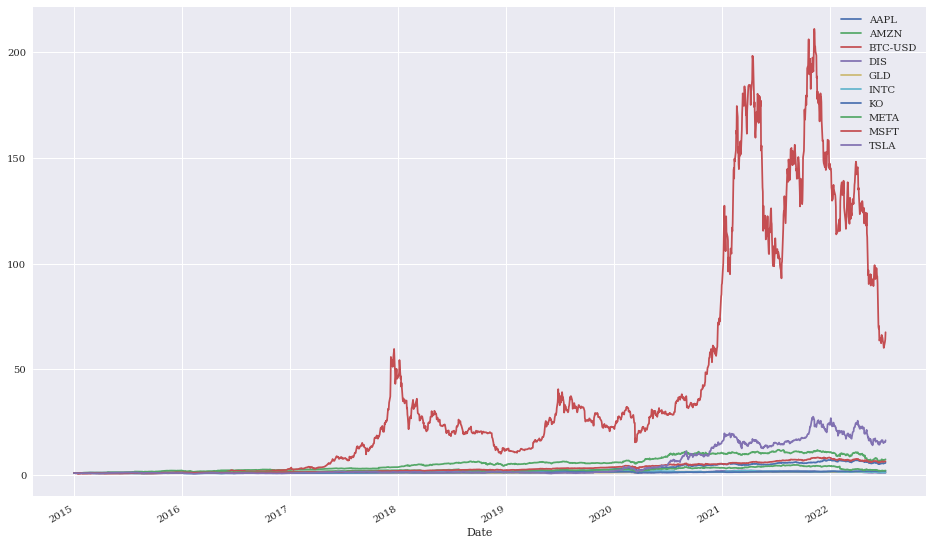

In [4]:
#Lets Visualize the behaviour of each stock's price normalized 
(stocks[tickers] / stocks[tickers].iloc[0]).plot(figsize=(16, 10));

## Return of a portfolio

The total return of the porfolio is going to be a simple weigthed average of the (total) returns of single assets, i.e.:
        ${R_p} =\sum \limits _{i=1} ^{N}  {w_i}  {R_i} = {w^T}  R $
where ${R_i},{R_p}$ are return of stock i and return of portfolio. ${R} := ({R_1},..........,{R_N})^T$ Note that if we have a dataset of past returns, the total return  ${R_p}$ is computed as above using the returns of the past data. On the other hand, if we are going to invest now, we do not have a series of true (past) return, but we instead would have expected returns. Hence, in this case we would have the maean value $\mathbb{E}$ in the formula above.


In [35]:
#Computing log daily returns of each stock
daily_ret = np.log(stocks / stocks.shift(1)).dropna()
daily_ret

,AAPL,AMZN,BTC-USD,DIS,GLD,INTC,KO,META,MSFT,TSLA
Date,,,,,,,,,,
2015-01-02,-0.009677,-0.005816,-0.016247,-0.004681,0.004393,0.002028,-0.001813,0.005496,0.006606,-0.014037
2015-01-05,-0.028773,-0.020957,-0.137826,-0.014757,0.014965,-0.011545,0.000000,-0.016192,-0.009063,-0.042857
2015-01-06,0.000417,-0.023436,0.041814,-0.005357,0.011334,-0.018615,0.007531,-0.013565,-0.014874,0.005695
2015-01-07,0.013662,0.010782,0.028080,0.010223,-0.005909,0.020662,0.012230,0.000000,0.012657,-0.001658
2015-01-08,0.037923,0.006680,-0.038053,0.010234,-0.004217,0.018572,0.012082,0.026309,0.028924,-0.001661
...,...,...,...,...,...,...,...,...,...,...
2022-06-30,-0.018192,-0.025195,-0.016009,-0.013155,-0.006096,0.003213,0.002865,-0.016545,-0.013267,-0.017736
2022-07-01,0.016035,0.031054,-0.026394,0.018264,-0.000831,-0.029019,0.023098,-0.007595,0.010651,0.012352
2022-07-05,0.018753,0.035330,0.046677,0.010759,-0.021438,0.009585,-0.017234,0.049733,0.012519,0.025215


In [6]:
#Compting Annualized Returns
N_DAYS = 252     # number of trading dates in a years
annual_ret = daily_ret.mean() * N_DAYS
annual_ret

AAPL       0.235919
AMZN       0.268432
BTC-USD    0.561473
DIS        0.013884
GLD        0.047509
INTC       0.033961
KO         0.085457
META       0.105495
MSFT       0.251236
TSLA       0.373531
dtype: float64

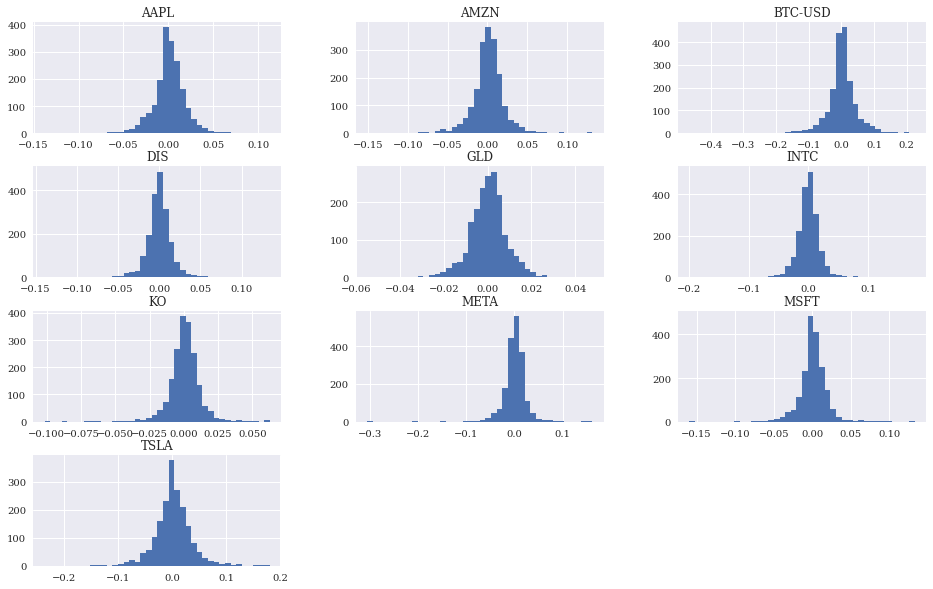

In [7]:
# Lets visualize the distribution of returns for each stock in our portfolio
daily_ret.hist(bins=40, figsize=(16, 10));

## Volatility of a portfolio

The volatility of the porfolio is computed as the (square root of the) variance of the weigthed sum of the returns of single assets. Formal representation is as follows: 
${\sigma ^2 }_p = \mathbb{E}({r_i} - \mu_i) ({r_j} - \mu_j)$
            ${=} {\sum_i} {\sum_j} {w_i} {w_j}$
            ${=} {w^T} {\sum} {w} $
where ${\sigma ^2}_p$ is portfolio variance and T attribute or transpose() method gives the transpose of a vector or matrix.


In [8]:
#Create a annualized covariance matrix of the portfolio
cov_mat = daily_ret.cov() * N_DAYS
cov_mat

,AAPL,AMZN,BTC-USD,DIS,GLD,INTC,KO,META,MSFT,TSLA
AAPL,0.087288,0.054663,0.034009,0.035153,-0.000230,0.051987,0.021431,0.058838,0.057174,0.071067
AMZN,0.054663,0.102904,0.033103,0.031485,-0.000435,0.044561,0.014563,0.068427,0.058098,0.071100
BTC-USD,0.034009,0.033103,0.548445,0.033183,0.008400,0.036565,0.009464,0.034232,0.034858,0.058523
DIS,0.035153,0.031485,0.033183,0.073685,-0.001777,0.037110,0.023440,0.037128,0.035384,0.044351
GLD,-0.000230,-0.000435,0.008400,-0.001777,0.019670,0.000479,0.001212,-0.000005,-0.000919,0.002373
INTC,0.051987,0.044561,0.036565,0.037110,0.000479,0.105093,0.023302,0.050198,0.054366,0.064105
KO,0.021431,0.014563,0.009464,0.023440,0.001212,0.023302,0.035875,0.017741,0.022845,0.020546
META,0.058838,0.068427,0.034232,0.037128,-0.000005,0.050198,0.017741,0.126481,0.058234,0.070481
MSFT,0.057174,0.058098,0.034858,0.035384,-0.000919,0.054366,0.022845,0.058234,0.076041,0.066843
TSLA,0.071067,0.071100,0.058523,0.044351,0.002373,0.064105,0.020546,0.070481,0.066843,0.317042


## Efficient Frontiers

In the MPT, the efficient frontier is a curve denoting the efficient part of the volatility-return plane. Formally, it is the set of portfolios that can be constructed with the given input assets that have the maximum expected returns for a fixed level of volatility and, in turn, the lowest volatilities for a fixed level of expected return. The efficient frontier was first formulated by Harry Markowitz (1952).

We have to construct a portfolio of several assets and we want to find the optimal percentages of investment to be allocated in these assets so that, for example, the total (expected) return of such a portfolio is maximixed for a given level of volatility.

Suppose we have $ {N > 1} $ stocks and we decide to invest our capital in them. Let ${w} := ({w_1},..........,{w_N})^T$ , with $ {w_i} \epsilon (0,1) $  for all ${i} = 1,2,.......,{N}$ , where each ${w_i}$ represents the proportion of the investiment (a percentage of the capital invested) in asset . These quantities are the weights.

Since we invest all of our capital, there holds $ \sum {w_i} = 1$  (this is a long-only strategy).

In [9]:
# Create effecient frontier using monte carlo simulation
N_PORTFOLIOS = 10 ** 5
n_assets = len(tickers)


In [10]:
#Simulate random portfolio weights:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [11]:
#Calculate the portfolio metrics:
portf_rtns = np.dot(weights, annual_ret)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [12]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol,'sharpe_ratio': portf_sharpe_ratio})
portf_results_df

,returns,volatility,sharpe_ratio
0,0.247517,0.257646,0.960688
1,0.265410,0.261451,1.015144
2,0.159032,0.208293,0.763499
3,0.134464,0.188375,0.713811
4,0.127632,0.209467,0.609319
...,...,...,...
99995,0.213880,0.224617,0.952198
99996,0.254056,0.265269,0.957732
99997,0.175434,0.214428,0.818148
99998,0.263205,0.276644,0.951422


Now we create a scatter plot coloured by sharpe ratios of the portfolios generated above 

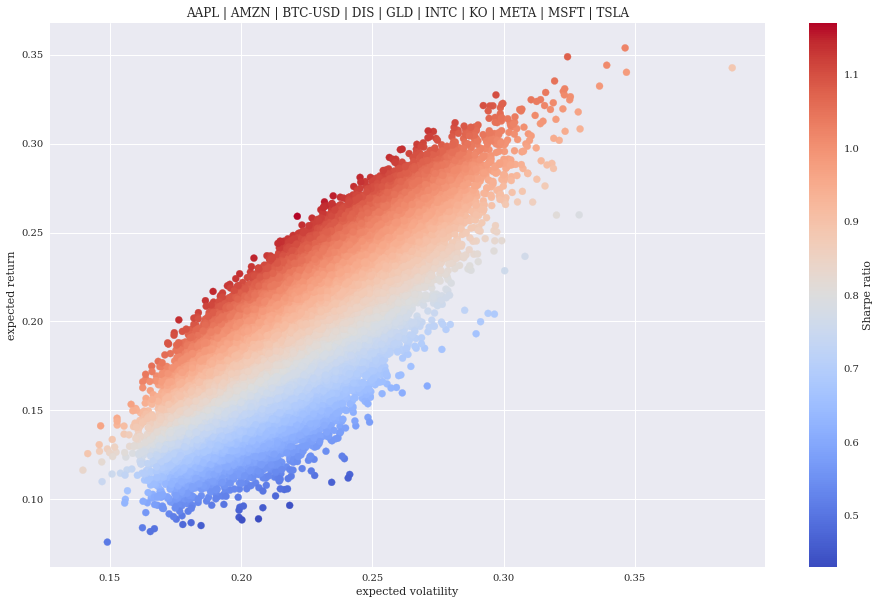

In [13]:
#Plotting the results of monte carlo simulation
plt.figure(figsize=(16, 10))
fig = plt.scatter(portf_results_df['volatility'], portf_results_df['returns'],
c=portf_results_df['sharpe_ratio'], cmap='coolwarm')
cb = plt.colorbar(fig)
cb.set_label('Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.title(' | '.join(tickers));

We can see that if the investor is targeting a return of 20%  he could simply hold a portfolio with volatility of  about 18% , although there are many other portfolios that can guarantee the same return but with much higher volatilities. It is clear that one should carefully choose the weights of the portfolio.

We can see, in particular, that there are two important portfolios:

- the portfolio with the Global Minimum Volatility (GMV), i.e., the global minimum variance portfolio
- the portfolio with the Maximum Sharpe Ratio (MSR).

From the code above we can easily locate these two portfolios in our dataframe by looking at the lowest volatility and highest sharpe ratio and and recover the corresponding weights that have been stored.

In [14]:
# find the portfolio with lowest volatility 
low_vol_portfolio = portf_results_df.iloc[ portf_results_df['volatility'].idxmin() ]
print("Global Minimum Volatility portfolio:")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# find the portfolio with highest sharpe ratio
high_sharpe_portfolio = portf_results_df.iloc[ portf_results_df['sharpe_ratio'].idxmax() ]
print("Maximum Sharpe Ratio portfolio:")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

Global Minimum Volatility portfolio:
- return      : 11.63%
- volatility  : 13.97%
- sharpe ratio: 0.83
Maximum Sharpe Ratio portfolio:
- return      : 25.92%
- volatility  : 22.14%
- sharpe ratio: 1.17


In [15]:
#Lets plot an efficient frontier too for that lets figure out data points on efficient frontier
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)


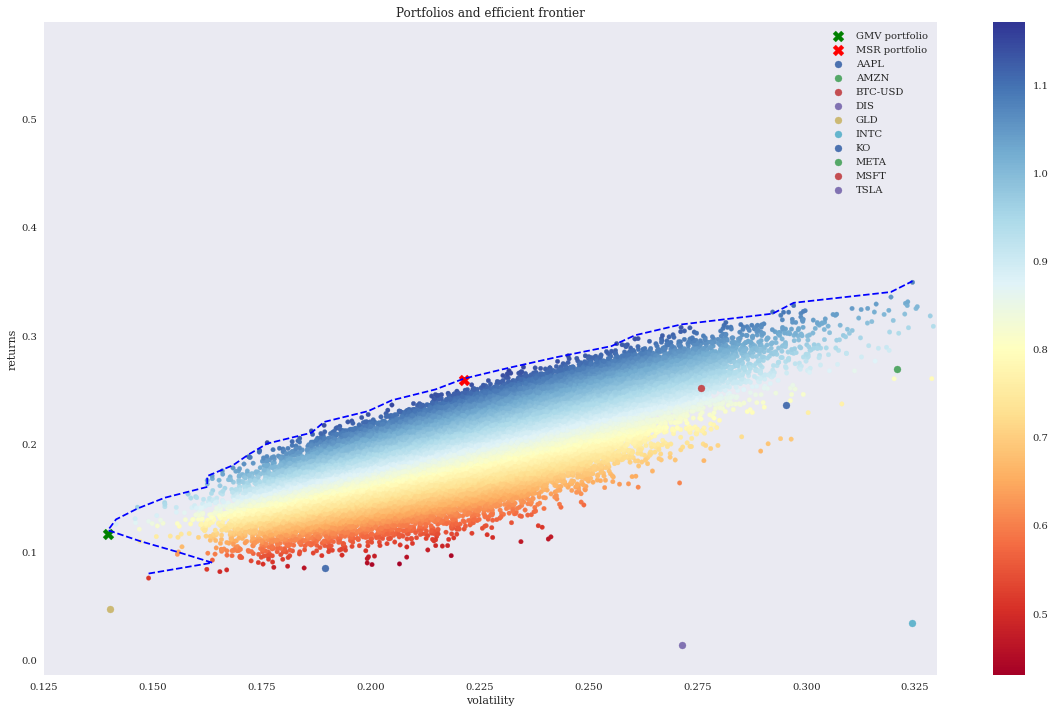

In [16]:
#Plotting EF, GMV, MSR and individual stocks returns vs volitility

fig, ax = plt.subplots(1,1, figsize=(20,12)) 

im = ax.scatter(portf_results_df["volatility"], portf_results_df["returns"], c=portf_results_df["sharpe_ratio"], s=20, edgecolor=None, label=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("returns")
ax.grid()

ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=annual_ret[asset_index], 
                #marker=MARKS[asset_index], 
                #s=150, 
                #color='black',
                label=tickers[asset_index])

ax.set_xlim([0.125,0.33])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()

## Finding the optimal portfolios: maximizing the sharpe ratio
Now, consider the case of finding the portfolio (on the efficient frontier) with the highest sharpe ratio. Note that scipy offers a minimize method, but no a maximize a method, and we may then conclude that we are not able to find such a portfolio by solving an optimization problem. However, the maximization of the sharpe ratio is nothing but the minimization of the negative sharpe ratio. That is, we have:
${minimize} - ({R_p}-{r_f})/{\sigma_p} =:Sharpe Ratio $

subject to:

$\left\{
    \begin{array}{ll}
        {w^T}1 \mbox  = 1 \\
        {0 } \leq w \geq 1
    \end{array}
\right.$
 


In [17]:
#Define functions calculating portfolio returns and volatility:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    return -portf_sharpe_ratio

def port_vol(w, avg_rtns, cov_mat):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    return portf_volatility 

def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

In [18]:
RF_RATE = 0

args = (annual_ret, cov_mat, RF_RATE)
constraints = ({'type': 'eq', 
                'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf_opt = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)

In [19]:
max_sharpe_portf_w = max_sharpe_portf_opt['x']
print("Global Maximum Sharpe Ratio portfolio:")
max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, 
                                            annual_ret),
                    'Volatility': port_vol(max_sharpe_portf_w, 
                                                annual_ret, 
                                                cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf_opt['fun']}
max_sharpe_portf

Global Maximum Sharpe Ratio portfolio:


{'Return': 0.22214973926532688,
 'Volatility': 0.1853291461462034,
 'Sharpe Ratio': 1.1986767536827492}

## Finding the optimal portfolios: minimizing the volatility

In the experiments above, we found the optimal portfolios, i.e., the ones on the efficient frontier, by simulating a high number of portfolios and then plotting them. From the plot we could see what the efficient frontier looked like. However, we can find an optimal portfolio on the efficient frontier by solving a minimization problem, for example, by applying the scipy optimize method.

For example, suppose we want to find the portfolio (on the efficient frontier) which has the minimum volatility. Then the minimization problem is:

${minimize} : {1/2} {w^T} \sum{w} , $

such that:

$\left\{
    \begin{array}{ll}
        {w^T}1 \mbox  = 1 \\
        {0 } \leq w \geq 1
    \end{array}
\right.$


In [20]:
args = (annual_ret, cov_mat)
min_potf_vol_opt = sco.minimize(port_vol, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)


In [21]:
#Optimal Weight for Maximum Sharpe Ratio Portfolio
opt_min_vol_w = min_potf_vol_opt['x']
opt_min_vol_w

array([ 0.014,  0.050,  0.000,  0.071,  0.614,  0.000,  0.236,  0.003,
        0.013,  0.000])

In [22]:
print("Global Minimum Volitility portfolio:")
min_potf_vol = {'Return': get_portf_rtn(opt_min_vol_w, 
                                            annual_ret),
                    'Volatility': port_vol(opt_min_vol_w, 
                                                annual_ret, 
                                                cov_mat),
                    'Sharpe Ratio': -neg_sharpe_ratio(opt_min_vol_w, 
                                                annual_ret, 
                                                cov_mat,0)}
min_potf_vol

Global Minimum Volitility portfolio:


{'Return': 0.07051582492258752,
 'Volatility': 0.11051418657859616,
 'Sharpe Ratio': 0.6380703428734703}

We can now expand on this code to increase our universe of stocks and use optimazation techniques to allocate optimal portfolio weights based on requirements. We also notice that monte carlo method yields better results as the returns are higher for maximum sharpe ratio whereas for GMV portfolio optimization outperforms the simulation.   

## Lets Visualize the returns of our optimized portfolio against the benchmark of equally weighted porttfolio. 

In [54]:
ret_msr = (daily_ret*max_sharpe_portf_w).sum(axis='columns')
total_ret_msr = (ret_msr+1).cumprod()
ret_gmv = (daily_ret*opt_min_vol_w).sum(axis='columns')
total_ret_gmv = (ret_gmv+1).cumprod()

In [55]:
eweights = np.array(n_assets * [1. / n_assets,])
ret_ewp = (daily_ret*eweights).sum(axis='columns')
total_ret_ewp = (ret_ewp+1).cumprod()

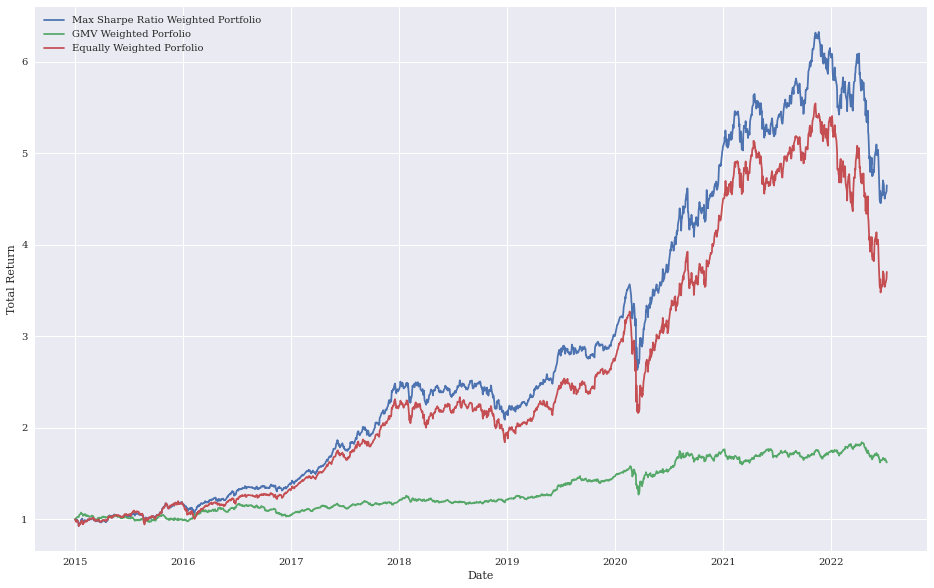

In [56]:
plt.plot(total_ret_msr, label='Max Sharpe Ratio Weighted Portfolio')
plt.plot(total_ret_gmv, label='GMV Weighted Porfolio')
plt.plot(total_ret_ewp, label='Equally Weighted Porfolio')
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.legend(loc="upper left")

Optimized Sharpe ratio weighted portfolio outperforms the benchmark whereas the minimum volitility porfolio also does its job as we can see less volitilty in our returns for that series.